<a href="https://colab.research.google.com/github/jaimovi/Analise-de-similaridade-de-Banco-de-Perguntas-por-metodos-NLP/blob/main/Perguntas_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Apresentação
##Este notebook estrutura todas as etapas de pre processamento necessárias e que deverão ser aplicadas, independente de qual modelo . Estabelecemos as etapas de transformação em caixa baixa, retirando stopwords, caracteres especiais e etc.Em seguida utilizamos ainda neste Notebook o método de comparação por bag of words, calculando os vetores das sentenças, limitando o número de linhas para análise, considerando a restrição de recursos computacionais do Colab. A opção então foi de não importar todas as linhas do Banco de perguntas proposto, com 170000 perguntas e apenas buscar similaridades com as primeiras 5000 perguntas.
##Há ainda no mesmo banco de dados o cadastro de Listas de verificação armazenadas com 466000 perguntas, podemos identificar a dificuldade de uma trabalho manual com 5000 perguntas, quer seja com 170000 e então com 466000 , a importância que identificamos com os métodos apresentados na questão de Linguística e os processamentos pelos métodos deste notebook.
##A segunda parte da prova de Conceito faz uso de modelos transformacionais, BERT e ELECTRA para consolidar as respostas encontradas na primeira parte e compararmos os resultados para diferentes abordagens de modelos NLP(processamento Neuro Linguístico).





## 1.1 Conceito de Bag of Words:
###Bag of Words (BOW) é um método para extrair recursos de documentos de texto. Esses recursos podem ser usados ​​para treinar algoritmos de aprendizado de máquina. Ele cria um vocabulário de todas as palavras exclusivas que ocorrem em todos os documentos do conjunto de treinamento.
###Em termos simples, é uma coleção de palavras para representar uma frase com contagem de palavras e principalmente desconsiderando a ordem em que aparecem.
###BOW é uma abordagem amplamente usada com:
### Processamento de linguagem natural
### Recuperação de informações de documentos
### Classificações de documentos
###Em um alto nível, envolve as seguintes etapas.
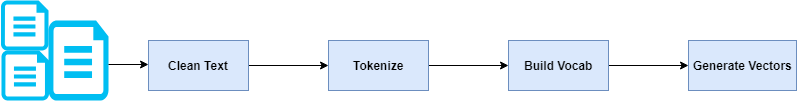

###Os vetores gerados podem ser inseridos em seu algoritmo de aprendizado de máquina.



##1.2 Conceito de BERT:
 O modelo BERT foi proposto em BERT: Pré-treinamento de Transformadores Profundos Bidirecionais para Entendimento de Linguagem por Jacob Devlin, Ming-Wei Chang, Kenton Lee e Kristina Toutanova. É um transformador bidirecional pré-treinado usando uma combinação de objetivo de modelagem de linguagem mascarada e previsão da próxima frase em um grande corpus que compreende o Toronto Book Corpus e a Wikipedia.
 Um modelo de representação de linguagem denominado BERT, que significa Bidirectional Encoder Representations from Transformers. Ao contrário dos modelos de representação de linguagem recentes, o BERT é projetado para pré-treinar representações bidirecionais profundas de texto não rotulado, condicionando conjuntamente o contexto esquerdo e direito em todas as camadas. Como resultado, o modelo BERT pré-treinado pode ser ajustado com apenas uma camada de saída adicional para criar modelos de última geração para uma ampla gama de tarefas, como resposta a perguntas e inferência de linguagem, sem tarefas substanciais. modificações específicas da arquitetura.
 BERT é conceitualmente simples e empiricamente poderoso. Ele obtém novos resultados de última geração em onze tarefas de processamento de linguagem natural, incluindo aumentar a pontuação do GLUE para 80,5% (7,7% de melhoria absoluta), precisão MultiNLI para 86,7% (4,6% de melhoria absoluta), SQuAD v1.1 perguntas respondendo Teste F1 a 93,2 (melhoria absoluta de 1,5 pontos) e SQuAD v2.0 Teste F1 a 83,1 (melhoria absoluta de 5,1 pontos).
 Pontas:
     O BERT foi treinado com os objetivos de modelagem de linguagem mascarada (MLM) e previsão de próxima frase (NSP). É eficiente na previsão de tokens mascarados e em NLU em geral, mas não é ideal para geração de texto.
     Referência Bibliográfica:
 https://www.affde.com/pt/bert-explained-what-you-need-to-know-about-googles-new-algorithm.html



##1.3 Conceito de ELECTRA:

ELECTRA é um novo método auto-supervisionado de aprendizagem e compreensão de linguagem natural desenvolvido pela IA do Google. ELECTRA significa “Aprendendo Eficientemente um Codificador que Classifica Substituições de Token com Precisão”, utilizando eficientemente os métodos do modelo LM (Modelagem de Linguagem) e Modelo MLM (Modelagem de Linguagem Mascarada). Os modelos ELECTRA são treinados para entender a diferença entre tokens de entrada “reais” e tokens de entrada “falsos”.
Metodologia ELECTRA

Os métodos disponíveis recentemente para treinamento são divididos em categorias: Modelos de primeira língua (LMs) como GPT que executam a tarefa da esquerda para a direita de maneiras unidirecionais e prevendo a próxima palavra de acordo com o contexto anterior. Segundo método executado por modelos de linguagem mascarada (MLMs), por ex. BERT, RoBERTa e ALBERT. Esses modelos mascararam algumas das palavras dos tokens de entrada fornecidos e executaram no lado bidirecional para os tokens de entrada. As técnicas de MLM têm a vantagem de desempenho bidirecional, mas 15% dos tokens de entrada são mascarados, reduzindo a quantidade aprendida de cada frase.
 ELECTRA usa um novo método de pré-treinamento, chamado de detecção de token substituído (RTD), que treina um modelo bidirecional (como um MLM) enquanto aprende a partir de todas as posições de entrada (como um LM). Inspirado por redes adversárias geradoras (GANs), a ELECTRA treina o modelo para entender a diferença entre dados de entrada “reais” e “falsos”. 
 Neste método, em vez de alterar alguns tokens de entrada substituindo tokens por “[MÁSCARA]” como no BERT, os tokens de entrada substituem alguns tokens de entrada incorretos, provavelmente podemos chamar tokens falsos. Por exemplo, na frase "Rahul anda de bicicleta nova", o token de "bicicleta" é substituído pelo token de "bicicleta".
   No método de detecção de token substituído (RTD), os tokens de substituição vêm de outra rede neural chamada gerador, que substitui o token mascarado por tokens “falsos”. O gerador pode ser qualquer pequeno modelo de linguagem mascarada (MLM) que é treinado em conjunto com outro modelo chamado Discriminador. Modelos discriminadores foram estruturados como GAN (redes adversárias geradoras).
     O gerador e o discriminador compartilham os mesmos embeddings de palavras de entrada. Durante o pré-treinamento o modelo treina ao máximo com gerador devido à dificuldade de aplicar o modelo GAN ao texto. Após o pré-treinamento, o gerador é removido e apenas faz o ajuste fino do discriminador (o modelo ELECTRA). 
     Ele melhora consideravelmente em relação aos métodos anteriores ao usar menos de 25% do orçamento de computação, com desempenho comparável ao RoBERTa e XLNet. Os modelos ELECTRA pequenos podem treinar rapidamente em uma GPU. Os modelos ELECTRA alcançam resultados de última geração nas respostas a perguntas SQuAD.   

Carrego as Bibliotecas

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#2.1 Importar a base de Perguntas, Limitando a 5000 linhas iniciais.

In [ ]:
# Load Data
df=pd.read_excel('3 colunas de PERGUNTA.xlsx', usecols = "A,C:C")
df= df.rename(columns={'Texto da Pergunta': 'Pergunta'})
df= df.rename(columns={'Codigo da Pergunta': 'Codigo'})
df= df[:5000]

cabeçalho

In [ ]:
#Examinando a Importação
#Observar que toda pergunta possui um código unico, oriundo da base de dados.
df.head()

In [ ]:
df.shape

In [ ]:
df.tail(1)

In [ ]:
df.info()

#2.2 Análise Exploratória dos Dados

In [ ]:
#Há muita incidência de perguntas em Caixa alta e caixa baixa.
print(df.Pergunta)

##2.2.1 Transformar a coluna em análise Pergunta para minusculo, eliminar os valores nulos, stopwords, etc.

In [ ]:
auxiliar = df['Pergunta'].str.lower()
df['Pergunta']= auxiliar
df.head(1000)

In [ ]:
df.dropna(inplace=True)

In [ ]:
import unicodedata

def remove_accents(input_str):
    try:
      nfkd_form = unicodedata.normalize('NFKD', input_str)
    except:
      print(input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return str(only_ascii)

auxiliar = [remove_accents(sentence).replace('b\'','') for sentence in df['Pergunta']]
auxiliar2 = [sentence.replace('\'','') for sentence in auxiliar]
df['Pergunta']= auxiliar2

In [ ]:
df.head()

In [ ]:
todas_stopwords = stopwords.words('portuguese')
todas_stopwords.append('para')

In [ ]:
from nltk.corpus import stopwords
# inserir nova stopword
# stopwords.append('existe')
print(stopwords.words('portuguese'))

#2.3 Para o caso de bag of words:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# https://stackoverflow.com/questions/8897593/how-to-compute-the-similarity-between-two-text-documents
vect = TfidfVectorizer(min_df=1, stop_words=todas_stopwords)
tfidf = vect.fit_transform(df['Pergunta'][:5000])
pairwise_similarity = tfidf * tfidf.T

#2.4 Estamos buscando os pares de pergunta similares, de acordo com o cálculo das diferenças entre os cosenos, buscando um limiar adequado.

In [ ]:
pairwise_similarity

In [ ]:
pd.DataFrame(pairwise_similarity.toarray())

In [ ]:
#Armazenando o resultado em um Array
resultado = pd.DataFrame(pairwise_similarity.toarray())

In [ ]:
import numpy as np
import scipy
from scipy import stats

In [ ]:
print (resultado)
  
#?? print ("\nclipped arr1 : \n", stats.threshold(resultado, threshmin = 0.7 , threshmax = 1, newval = 0.85))

In [ ]:
resultado.head()

In [ ]:
resultado.tail()

In [ ]:
#Estamos testando alguns pares identificados nos passos anteriores.
df['Pergunta'][19], df['Pergunta'][3127],df['Pergunta'][3364],df['Pergunta'][3779],df['Pergunta'][3914]

## 2.4.1 Definimos um valor de threshold para classificar como semelhante.
### Proposta daqui em diante, apenas manter a análise exploratória das semelhanças ou Remover as perguntas semelhantes do conjunto de 5000 referente a amostra do Banco de perguntas, mas no entanto a opção desta prova de conceito é justamente a de validamos que a utilização dos métodos de NLP podem contribuir para o saneamento de duplicidades em contexto.

In [ ]:
#Comentário:
#resultado[(resultado > 0.99)].any(1)

##2.4.2 Identificação dos pares de perguntas similares:

In [ ]:
to_drop = []
par_perguntas =[]

for column in resultado.columns:
 for index in resultado.index:
  if resultado.loc[index, column] > 0.95 and index != column:
   to_drop.append([index,column])
   par_perguntas.append([df['Pergunta'][index],df['Pergunta'][column]])

In [ ]:
#Identificamos (1110/2) 555 pares com semelhança de 0.95, sugerindo que sejam removidas do banco por duplicidade.
len(to_drop)

In [ ]:
#Identificando os pares
print(to_drop)

In [ ]:
to_drop

In [ ]:
par_perguntas[55]

In [ ]:
#Identificação textual dos pares de perguntas similares
par_perguntas

In [ ]:
#identificação textual pontual entre pares
df['Pergunta'][3779],df['Pergunta'][3914]
                                  

#3.Segunda parte do trabalho abordará a busca da similaridade entre as perguntas utilizando o modelo BERT para comparar os resultados de encontrados anteriormente na proposta  da etapa de Bag of words.
##Utilizaremos ainda o modelo ELECTRA como alternativa de busca de similaridades entre as perguntas do banco de perguntas.
##Aplicação de modelo transformer para similaridade

 http://www.JohnSnowLabs.com

 https://github.com/JohnSnowLabs/spark-nlp





In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
!pip install nlu  pyspark==2.4.7 > /dev/null   

import nlu

# 3.1 Carregar o dataset de Perguntas

## 3.1.1 Estamos alterando os nomes da coluna para manter a compatibilidade com o Modelo proposto para o BERT

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset to Pandas
df= pd.read_excel('3 colunas de PERGUNTA.xlsx', usecols = "A,C:C")
df= df.rename(columns={'Texto da Pergunta': 'Title'})
df= df.rename(columns={'Codigo da Pergunta': 'Id'})
df= df[:5000]
max_r = 5000
df = df.iloc[0:max_r]
df

In [ ]:
auxiliar = df['Title'].str.lower()
df['Title']= auxiliar
df.head(1000)

In [ ]:
df.dropna(inplace=True)

In [ ]:
import unicodedata

def remove_accents(input_str):
    try:
      nfkd_form = unicodedata.normalize('NFKD', input_str)
    except:
      print(input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return str(only_ascii)

auxiliar = [remove_accents(sentence).replace('b\'','') for sentence in df['Title']]
auxiliar2 = [sentence.replace('\'','') for sentence in auxiliar]
df['Title']= auxiliar2

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
todas_stopwords = stopwords.words('portuguese')
todas_stopwords.append('para')

In [ ]:
from nltk.corpus import stopwords
# inserir nova stopword
# stopwords.append('existe')
print(stopwords.words('portuguese'))

# 3.2. Incorporar perguntas com embeddings de frases de BERT 

Podemos incorporar o título ou o corpo da pergunta.

In [ ]:
pipe = nlu.load('embed_sentence.bert')
#pipe = nlu.load('albert bert elmo electra xlnet pos')
predictions = pipe.predict(df.Title, output_level='document')
predictions

In [ ]:
predictions.iloc[0,2]


In [ ]:
predictions.iloc[0,1]

# 3.3 Como encontrar N sentenças mais semelhantes em um conjunto de dados para uma determinada sentença no conjunto de dados usando BERT
Frases com pequenas distâncias entre seus embeddings serão consideradas semelhantes entre si.

In [ ]:
## Calculando a  dinstancia entre todos pares de perguntas no DF
e_col = 'sentence_embedding_bert'

def get_sim_df_for_iloc(sent_iloc, predictions=predictions,e_col=e_col, pipe=pipe):
  # Esta função calcula as distâncias de uma frase nas previsões [sent_iloc] para todas as outras frases nas previsões usando a incorporação definida por e_col 
  # colocando os Embeddings em uma Matriz
  embed_mat = np.array([x for x in predictions[e_col]])
  # Calcula a distância entre cada par de Embedding
  sim_mat = cosine_similarity(embed_mat,embed_mat)
  print("Perguntas semelhantes a : " + df.iloc[sent_iloc].Title)
  # escreve os scores entre os pares
  df['sim_score'] = sim_mat[sent_iloc]
  return df 
sentence_to_compare=  19


sim_df_for_one_sent = get_sim_df_for_iloc(sentence_to_compare,predictions,e_col)
sim_df_for_one_sent = sim_df_for_one_sent[sim_df_for_one_sent['sim_score']>0.97]
sim_df_for_one_sent.sort_values('sim_score', ascending = False)

In [ ]:
to_drop_bert=[]
par_perguntas_bert=[]

for line in range(len(sim_df_for_one_sent)):
  sim_df_for_one_sent = get_sim_df_for_iloc(line,predictions,e_col)
  for lineToCheck in range(len(sim_df_for_one_sent)):
    if sim_df_for_one_sent['sim_score'][lineToCheck] > 0.99:
      to_drop_bert.append([line,lineToCheck])
      par_perguntas_bert.append([predictions['document'][line], sim_df_for_one_sent['Title'][lineToCheck]])

to_drop_bert
#sim_df_for_one_sent
sim_df_for_one_sent.sort_values('sim_score', ascending = False)

# 3.4 Função de plotagem para traçar a distância entre uma frase no conjunto de dados e todas as outras frases.

In [ ]:
def viz_sim_df_for_one_sent( sent_iloc=0, N = 514, sim_df_for_one_sent=sim_df_for_one_sent):
  # Representa as N sentenças mais semelhantes em nosso dataframe para a sentença na posição sent_iloc
  sim_df_for_one_sent = get_sim_df_for_iloc(sent_iloc)
  
  sim_df_for_one_sent.index = sim_df_for_one_sent.Title
  sent = sim_df_for_one_sent.iloc[sent_iloc].Title
  ax = sim_df_for_one_sent.sort_values('sim_score', ascending = False).iloc[:N].sim_score.plot.barh(title=f'As {N} frases mais semelhantes em nosso conjunto de dados para a pergunta \ n"{sent}"', figsize=(40, 30))
  ax.set_xlim(0.8, 1)

# Basta inserir qualquer número e obter o gráfico de semelhanças da frase em df.iloc [i]
# No caso escolhemos a mesma pergunta do título 2.3
viz_sim_df_for_one_sent(19)

#3.5 Calcular cada pontuação de similaridade entre cada frase no dataframe de entrada em pares e gere a matriz de similaridade

In [ ]:
def get_sim_df_total( predictions,e_col, string_to_embed,pipe=pipe):
  # Esta função calcula as distâncias entre cada par de perguntas. Cria para sempre a frase uma nova coluna com o nome igual à frase com a qual ela se compara

 
  # Colocando os Embeddings em uma Matriz
  embed_mat = np.array([x for x in predictions[e_col]])
  # calcular a distância entre cada par de embedding
  sim_mat = cosine_similarity(embed_mat,embed_mat)
  # for i,v in enumerate(sim_mat): predictions[str(i)+'_sim'] = sim_mat[i]
  for i,v in enumerate(sim_mat): 
    s = predictions.iloc[i].document
    predictions[s] = sim_mat[i]

  return predictions 
sim_matrix_df = get_sim_df_total(predictions,'sentence_embedding_bert', sentence_to_compare )
sim_matrix_df

#3.6 Plotar mapa de calor da matriz de similaridade para as primeiras N perguntas

In [ ]:
non_sim_columns  = ['text','document','sentence_embedding_bert']

def viz_sim_matrix_first_n(num_sentences=5, sim_df = sim_matrix_df):
  # Plotar mapa de calor para as primeiras num_sentences
  fig, ax = plt.subplots(figsize=(20,10)) 
  sim_df.index = sim_df.document
  sim_columns = list(sim_df.columns)
  for b in non_sim_columns : sim_columns.remove(b)
  # sim_matrix_df[sim_columns]
  ax = sns.heatmap(sim_df.iloc[:num_sentences][sim_columns[:num_sentences]]) 

  ax.axes.set_title(f"Matriz de Similaridade para as {num_sentences} sentenças no dataset",)

viz_sim_matrix_first_n()

#3.7 Plotar mapa de calor da matriz de similaridade para as perguntas entre starT_iloc e end_iloc

In [ ]:
def viz_sim_matrix_from_to(start_iloc,end_iloc, sim_df = sim_matrix_df):
  # Plotar matriz térmica para sentenças em df.iloc [início: fim]   
  fig, ax = plt.subplots(figsize=(50,30)) 
  sim_df.index = sim_df.document
  sim_columns = list(sim_df.columns)
  for b in non_sim_columns : sim_columns.remove(b)


  ax = sns.heatmap(sim_df.iloc[start_iloc:end_iloc][sim_columns[start_iloc:end_iloc]]) # +2 because first 2 cols are not sim_scores

  ax.axes.set_title(f"Matriz de similaridade para as perguntas nas posições df.iloc[{start_iloc}:{end_iloc}] no dataset",)

viz_sim_matrix_from_to(10,20)

#3.8 Encontrar as N perguntas mais semelhantes em um conjunto de dados para uma nova pergunta que não existe nos dados usando BERT

In [ ]:
def get_sim_df_for_string(predictions,e_col, string_to_embed,pipe=pipe):
  # Cria um Dataframe que tem uma coluna sim_score que descreve a semelhança com a variável string_to_embed

  # colocar vetores de predições na matriz
  embed_mat = np.array([x for x in predictions[e_col]])

  # inserir string de entrada
  embedding = pipe.predict(string_to_embed).iloc[0][e_col]

  # Replicar incorporação para string de entrada
  m = np.array([embedding,]*len(df))
  sim_mat = cosine_similarity(m,embed_mat)

  #write sim score
  df['sim_score'] = sim_mat[0]


  return df

In [ ]:
question = ' contribui para o seguro social?'
sim_df = get_sim_df_for_string(predictions,'sentence_embedding_bert', 'existe ASO disponivel' )
ax = sim_df.sort_values('sim_score', ascending = False).iloc[:20][['sim_score','Title']].plot.barh(title = f"Frases mais semelhantes para pergunta\n'{question}'", figsize=(40,32))
ax.set_xlim(0.8, 1)

#3.9 Defina a função de plotagem do Helper para representar os resultados da incorporação de uma string

In [ ]:
def viz_sim_df_for_one_sent( question='foi feita a vistoria no andaime', e_col='sentence_embedding_bert', N = 40, sim_df_for_one_sent=sim_df_for_one_sent):
  # Plots the N most similar sentences in our dataframe for sentence at position sent_iloc
  sim_df = get_sim_df_for_string(predictions,e_col,question )
  sim_df.index = sim_df.Title
  sim_df.sort_values('sim_score', ascending = False).iloc[:N][['sim_score','Title']].plot.barh(title = f"Most similar Sentences for sentence\n'{question}'", figsize=(20,14))
  ax.set_xlim(0.8, 1)

In [ ]:
question = 'contribui para o seguro social?'
e_col = 'sentence_embedding_bert'
viz_sim_df_for_one_sent(question,e_col)

In [ ]:
viz_sim_df_for_one_sent('seguro social?')

# 3.10 Multi Embedding Similarity, encontre as N perguntas mais semelhantes em um conjunto de dados para uma nova frase usando BERT, USE, Electra

Primeiro, vamos carregar 3 embeddings ao mesmo tempo e incorporar o texto em nosso conjunto de dados.

In [ ]:
multi_pipe = nlu.load('use en.embed_sentence.electra embed_sentence.bert')
multi_embeddings = multi_pipe.predict(df.Title,output_level='document')
# multi_embeddings = multi_pipe.predict(df.Title)

multi_embeddings

#3.11 Cálculo de similaridade de Multi Embeddings


Vamos definir uma função que recebe uma string para incorporar, uma lista de embeddings e um pipeline

get_sim_df_for_string_multi () calcula todos os embeddings carregados no pipeline NLU de entrada para a string de entrada e calcula as distâncias para cada frase no DF de entrada em todos os embeddings e nos dará uma pontuação normalizada final.  

In [ ]:
def get_sim_df_for_string_multi(predictions,embed_col_names, string_to_embed,pipe=multi_pipe):
  # Cria um Dataframe que tem uma coluna sim_score que descreve a semelhança com a variável string_to_embed
  #Isso acumula as distâncias de todos os embeddings em embed_col_names e normaliza dividindo por len (embed_col_names)
  #faça uma matriz de semelhança vazia que irá armazenar as semelhanças agregadas entre diferentes embeddings
  predictions.dropna(inplace=True)
  cum_sim = np.zeros((len(predictions),len(predictions)))

  # embed with all embedders currently loaded in pipeline
  embeddings = pipe.predict(string_to_embed).iloc[0]

  #loop over all embeddings columns and accumulate the pairwise distances with string_to_embed into cum_sim
  for e_col in embed_col_names:
    # get the current embedding for input string
    embedding = embeddings[e_col]  
    # stack embedding vector for input string
    m = np.array([embedding,]*len(predictions)) 
    # put df vectors in np matrix
    embed_mat = np.array([x for x in predictions[e_col]]) 
    # calculate new similarities
    sim_mat = cosine_similarity(m,embed_mat) 
  # accumulate new simmilarities in cum_sum
    cum_sim += sim_mat  

  predictions['sim_score'] = cum_sim[0]/len(embed_col_names) 
  return predictions

In [ ]:
question = 'contribui para o seguro social?'
col_names = ['sentence_embedding_electra','sentence_embedding_bert', 'sentence_embedding_use']

sim_df = get_sim_df_for_string_multi(multi_embeddings,col_names, question )
sim_df.index = sim_df.document
sim_df.sort_values('sim_score', ascending = False).iloc[:15][['sim_score','document']].plot.barh(title = f"Most similar Sentences for sentence\n'{question}'", figsize=(20,14))

# 3.12 Defina a função auxiliar para traçar os resultados de similaridade de uma string multiincorporada

In [ ]:
def viz_sim_df_for_one_sent_multi_embed( question='Foi feita a vistoria no Guindaste', e_cols=col_names, N = 40, multi_embeddings=multi_embeddings):
  # Representa as N sentenças mais semelhantes em nosso dataframe para a sentença na posição sent_iloc
  sim_df = get_sim_df_for_string_multi(multi_embeddings,col_names, question )
  sim_df.index = sim_df.document
  sim_df.sort_values('sim_score', ascending = False).iloc[:N][['sim_score','document']].plot.barh(title = f"Most similar Sentences for sentence\n'{question}'",figsize=(20,14))

  ax.set_xlim(0.8, 1)

question = 'contribui para o seguro social'
col_names = ['sentence_embedding_electra','sentence_embedding_bert', 'sentence_embedding_use']
viz_sim_df_for_one_sent_multi_embed(question, col_names)

In [ ]:
question = 'seguro social'
viz_sim_df_for_one_sent_multi_embed(question)

In [ ]:
question = 'treinamento'
viz_sim_df_for_one_sent_multi_embed(question)

#4.Conclusões

##Os Resultados obtidos segundo a análise por Bag of Words e a posterior comparação com os resultados encontrados nos métodos transformacionais, tanto BERT como ELECTRA, mesmo considerando abordagens diferentes entre os últimos dois métodos, encoraja o processamento de todo o Banco de dados em busca de todas as Similaridades entre as perguntas, considerando que a partir da restrição de 5000 perguntas, conseguimos identificar 555 pares de perguntas e em muitas vezes 3 ou mais similaridades, podemos projetar muito mais pares, ternos, quadras, etc. 
##Podemos reduzir o banco de perguntas para um tamanho enxugado e sem similaridades. 
##O objetivo desta prova de conceito não é a de reduzir o tamanho do banco de perguntas, mas indicar a oportunidade de utilização dos métodos de processamento neuro linguísticos para encontrar similaridades de contexto em bancos de informação não otimizados, reduzindo espaço de armazenamento e espaço de busca.

